(sec-intro-density-function)=
# La densità di probabilità 

Finora abbiamo considerato solo variabili casuali discrete, cioè variabili che assumono solo valori interi. Ma cosa succede se vogliamo usare variabili casuali per rappresentare lunghezze, o volumi, o distanze, o una qualsiasi delle altre proprietà continue nel mondo fisico o psicologico? È necessario generalizzare l'approccio usato finora.

Le variabili casuali continue assumono valori reali. L'insieme dei numeri reali è *non numerabile* perché è più grande dell'insieme degli interi.[^020_density_func-1] Le leggi della probabilità sono le stesse per le variabili casuali discrete e quelle continue. La nozione di funzione di massa di probabilità, invece, deve essere sostituita dal suo equivalente continuo, ovvero la *funzione di densità di probabilità*. Lo scopo di questo capitolo è quello di chiarire il significato di questa nozione.

[^020_density_func-1]: Georg Cantor dimostrò che era impossibile mappare uno a uno i reali negli interi, dimostrando così che l'insieme dei reali è non numerabile.

## Spinner e variabili casuali continue uniformi

Consideriamo il seguente esperimento casuale. Facciamo ruotare ad alta velocità uno spinner simmetrico imperniato su un goniometro e osserviamo la posizione in cui si ferma (individuata dall'angolo acuto con segno tra il suo asse e l'asse orizzontale del goniometro). Chiamiamo $\Theta$ la variabile casuale "pendenza dello spinner". Nella trattazione seguente useremo i gradi e, di conseguenza, $\Theta \in [0, 360]$.

Cosa implica per $\Theta$ dire che lo spinner è simmetrico? Possiamo dire che, in ciascuna prova, la rotazione dello spinner produce un angolo qualunque da 0 a 360 gradi. In altri termini, un valore $\Theta$ compreso tra 0 e 36 gradi ha la stessa probabilità di essere osservato di un valore $\Theta$ compreso tra 200 e 236 gradi. Inoltre, poiché 36 gradi è un decimo del percorso intorno al cerchio, la probabilità di ottenere un qualsiasi intervallo di 36 gradi sarà sempre uguale al 10%. Ovvero $P(0 \leq \Theta \leq 36) \ = \ \frac{1}{10}$ e $P(200 \leq \Theta \leq 236) \ = \ \frac{1}{10}$.

È importante notare che le probabilità precedenti non si riferiscono al fatto che $\Theta$ assume uno specifico valore, ma piuttosto all'evento di osservare $\Theta$ in un intervallo di valori. In generale, la probabilità che la pendenza $\Theta$ dello spinner cada in intervallo è la frazione del cerchio rappresentata dall'intervallo, cioè,

$$
P(\theta_1 \leq \Theta \leq \theta_2) = \frac{\theta_2 - \theta_1}{360}, \qquad 0 \leq \theta_1 \leq \theta_2 \leq 360.
$$

Nel caso di una variabile casuale continua, come l'angolo dello spinner, dunque, è facile capire come si può assegnare una probabilità all'evento per cui la v.c. assuma un valore compreso in un intervallo. 

#### Distribuzione uniforme

L'esempio dello spinner descrive il "meccanismo generatore dei dati" della v.c. continua più semplice, ovvero la la distribuzione continua uniforme. In teoria della probabilità, la distribuzione continua uniforme è una distribuzione di probabilità continua che è uniforme su un insieme, ovvero che attribuisce la stessa probabilità a tutti i punti appartenenti ad un dato intervallo [a,b] contenuto nell'insieme. 

La distribuzione uniforme continua definita sull'intervallo ${\displaystyle S=[a,b]\subset \mathbb {R}}$ viene denotata con ${\displaystyle {\mathcal {U}}(a,b)={\mathcal {U}}([a,b])}$. La sua densità di probabilità è

$$
f(x) = \frac{1}{b-a}, \quad a \leq x \leq b
$$

e 0 altrimenti. ([Wikipedia](https://it.wikipedia.org/wiki/Distribuzione_continua_uniforme))

Svolgiamo un piccolo esercizio con Python in cui, per continuare il nostro esempio dello spinner, consideriamom una $\mathcal {U}(0, 360)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
from scipy.stats import uniform
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
plt.style.use('tableau-colorblind10')

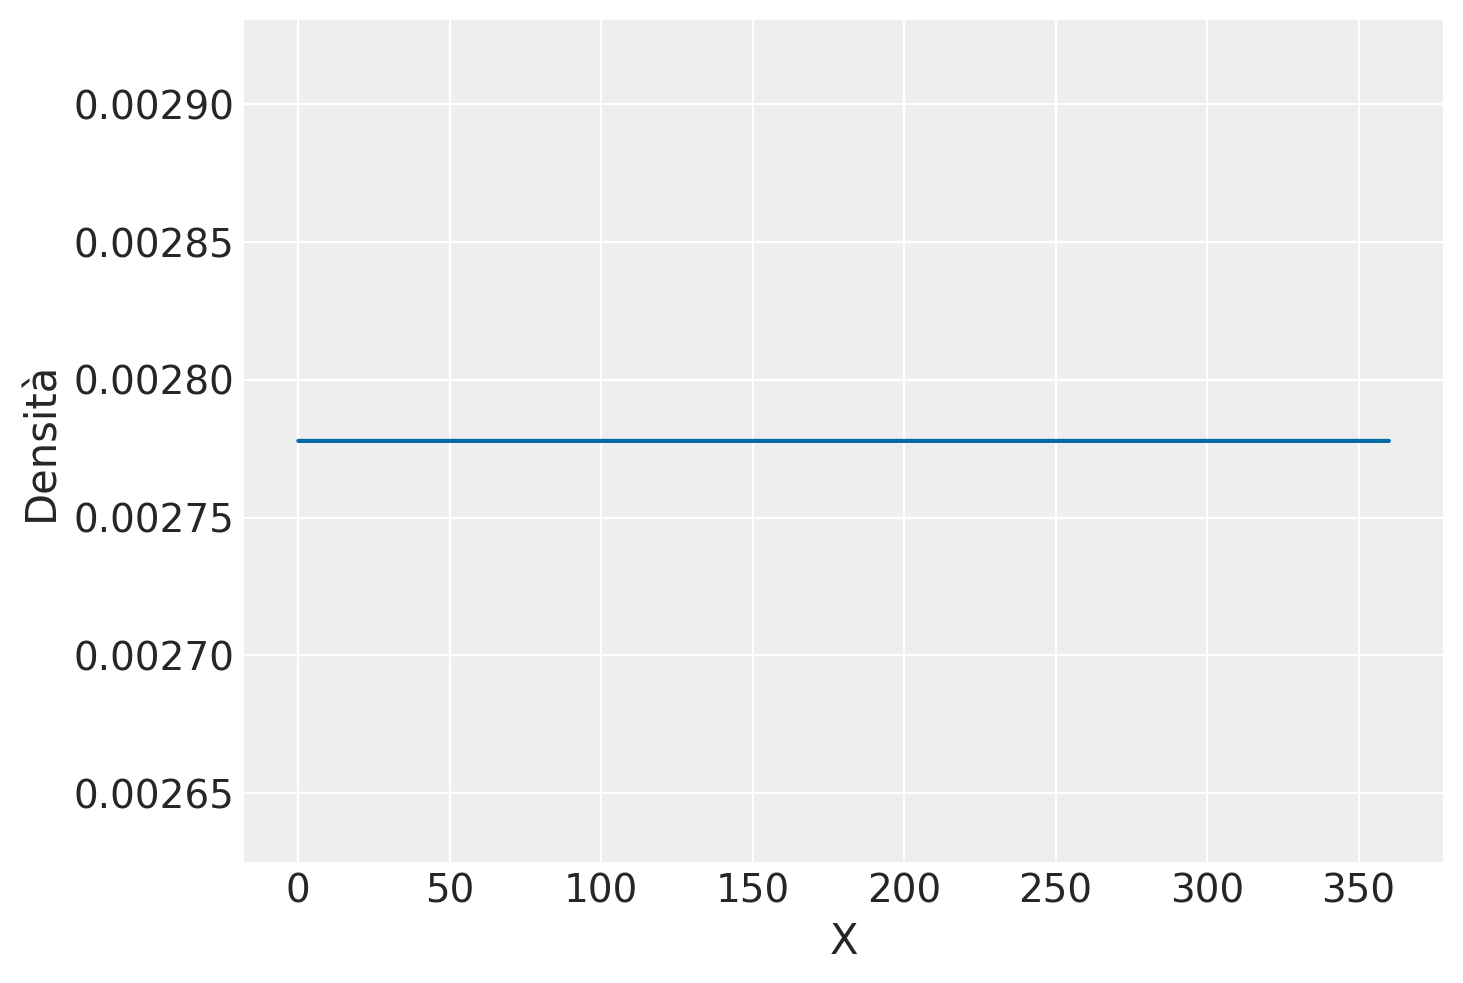

In [4]:
a=0
b=360
size=4000
x = np.linspace(a, b, size)

continuous_uniform_distribution = uniform(loc=a, scale=b)
continuous_uniform_pdf = continuous_uniform_distribution.pdf(x)

plt.plot(x, continuous_uniform_pdf)
plt.xlabel('X')
plt.ylabel('Densità')
plt.show()

Generiamo 10,000 valori casuali di una v.c. $\Theta \sim \mathcal {U}(0, 360)$.

In [5]:
data = np.random.uniform(0, 360, 10000) 

L'istogramma delle 10,000 realizzazioni di $\Theta$ è il seguente.

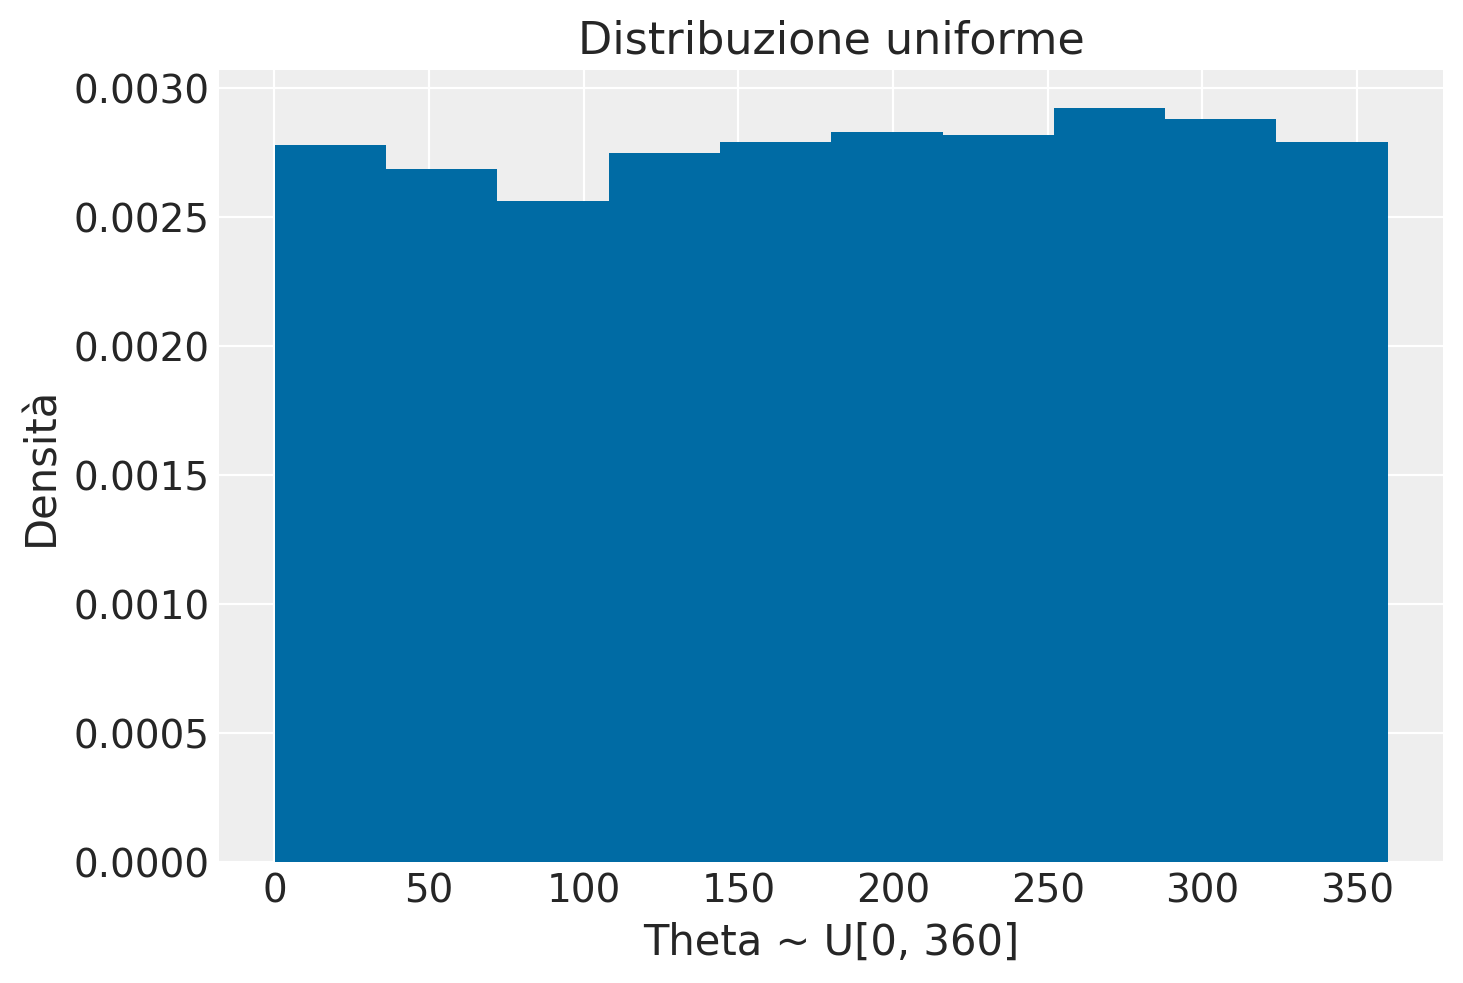

In [6]:
plt.hist(data, density=True) 
plt.xlabel('Theta ~ U[0, 360]')
plt.ylabel('Densità')
plt.title("Distribuzione uniforme")
plt.show()

È chiaro che, all'aumentare del numero delle realizzazioni $\Theta$, il profilo dell'istogramma tenderà a diventare una linea retta. Ciò significa che la funzione di densità di una variabile casuale uniforme continua è una costante: $f(\Theta) = c$.

Dalla figura precedente vediamo che l'area sottesa alla funzione di densità è $(b - a)\cdot c$. Dato che tale area deve essere unitaria, ovvero, $(b - a) \cdot c = 1$, possiamo trovare $c$ dividendo entrambi i termini per $b - a$,

$$
c  = \frac{\displaystyle{1}}{\displaystyle b - a}.
$$

Ovvero, se $\Theta \sim \mathcal{U}(a, b)$, allora

$$
p_{\Theta}(\theta) = \mathcal{U}(\theta \mid a, b),
$$

laddove

$$
\mathcal{U}(\theta \mid a, b) = \frac{1}{b - a}.
$$

In conclusione, la densità di una variabile casuale uniforme continua non dipende da $\theta$ -- è costante e identica per ogni possibile valore $\theta$.

Il valore atteso di $X \sim \mathcal {U}(a,b)$ è dato da

$$
\mathbb{E} = \frac{b - a}{2}.
$$

Nel caso della presente simulazione otteniamo

In [48]:
data.mean()

180.44171561785456

Svolgiamo un altro semplice esercizio. Consideriamo una variabile casuale uniforme $X$ definita sull'intervallo \[0, 100\]. Poniamoci il problema di trovare la probabilità $P(20 < X < 60)$.

Per trovare la soluzione è sufficiente calcolare l'area di un rettangolo di base $60 - 20 = 40$ e di altezza 1/100. La probabilità cercata è dunque $P(20 < X < 60) = 40 \cdot 0.01 = 0.4$.

### Il paradosso delle variabili casuali continue

Chiediamoci ora quale sia la probabilità che la v.c. continua assuma uno specifico valore. Consideriamo, ad esempio, una pendenza dello spinner *esattamente* uguale a 36 gradi (ovvero, 36.000000000000000000). Qual è la probabilità di osservare esattamente questo specifico valore? Paradossalmente, la risposta è zero:

$$
P(\Theta = 36) = 0.
$$

Infatti, se la probabilità di un qualunque valore fosse maggiore di zero, ogni altro possibile valore dovrebbe avere la stessa probabilità, dato che abbiamo assunto che tutti i valori $\Theta$ sono egualmente probabili. Ma se poi andiamo a sommare tutte queste probabilità il totale diventerà maggiore di uno, il che non è possibile.

Nel caso delle variabili casuali continue dobbiamo dunque rinunciare a qualcosa, e quel qualcosa è l'idea che, in una distribuzione continua, ciascun valore puntuale della variabile casuale possa avere una massa di probabilità maggiore di zero. Il paradosso sorge perché una realizzazione della variabile casuale continua produce sempre un qualche numero, ma ciscuno di tali numeri ha una probabilità nulla.

Le variabili casuali continue, dunque non hanno una massa di probabilità. Invece, una massa di probabilità viene assegnata alla realizzazione della variabile casuale in un intervallo di valori.

## Dagli istogrammi alle densità

Le considerazioni precedenti ci fanno capire che non esiste l'equivalente di una funzione di massa di probabilità per le variabili casuali continue. Esiste invece una *funzione di densità di probabilità* la quale, nei termini di una simulazione, può essere concepita nel modo seguente: avendo a disposizione un numero enorme di casi, quando l'intervallo $\Delta$ di ciascuna classe $\rightarrow$ 0, il profilo dell'istogramma delle frequenze delle classi di ampiezza $\Delta$ tenderà a diventare una curva continua. Tale curva continua $f(x)$ è detta funzione di densità di probabilità.

In un istogramma, l'area di ciascuna barra è proporzionale alla frequenza relativa delle osservazioni in quel'intervallo. Perché tutti gli intervalli hanno la stessa ampiezza, anche l'altezza di ciascuna barra sarà proporzionale alla frequenza relativa delle osservazioni in quel'intervallo.

Nella simulazione, possiamo pensare all'area di ciascuna barra dell'istogramma come alla stima della probabilità che la variabile casuale assuma un valore compreso nell'intervallo considerato. All'aumentare del numero $M$ di osservazioni, le probabilità stimate si avvicinano sempre di più ai veri valori della probabilità. All'aumentare del numero degli intervalli (quando l'ampiezza $\Delta$ dell'intervallo $\rightarrow$ 0), il profilo dell'istogramma tende a diventare una curva continua. Tale curva continua è appunto la funzione di densità di probabilità della variabile casuale.

Nella statistica descrittiva abbiamo già incontrato una rappresentazione che ha lo stesso significato della funzione di densità, ovvero il *kernel density plot*. La stima della densità del kernel (KDE), infatti, è un metodo non parametrico per stimare la funzione di densità di probabilità di una variabile casuale.

Per fare un esempio, generiamo 50 valori dalla distribuzione del quoziente di intelligenza. Stampiamo i primi 5 valori.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

μ, σ = 100, 15
size = 50
x = np.random.normal(loc=μ, scale=σ, size=size)
x[:5]

array([ 59.63009458,  96.35539329,  88.55863338, 100.85165235,
        92.56987922])

Creiamo ora un istogramma a cui sovrapponiamo la funzione di densità Normale con parametri corrispondenti alla media e deviazione standard del campione. Con poche osservazioni, non c'è una buona corrispondenza tra l'istogramma e la curva continua che abbiamo chiamato "funzione di densità".

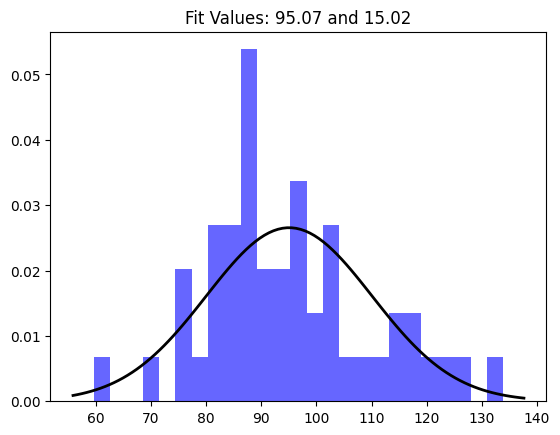

In [19]:
from scipy.stats import norm

mu, std = norm.fit(x) 
  
# Plot the histogram.
plt.hist(x, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Media e deviazione standard: {:.2f} e {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

Ora aumentiamo il numero di osservazioni. In questo caso consideriamo 20,000 valori del QI. Generiamo dunque una figura simile alla precedente, solo considerando un campione di dati più grande.

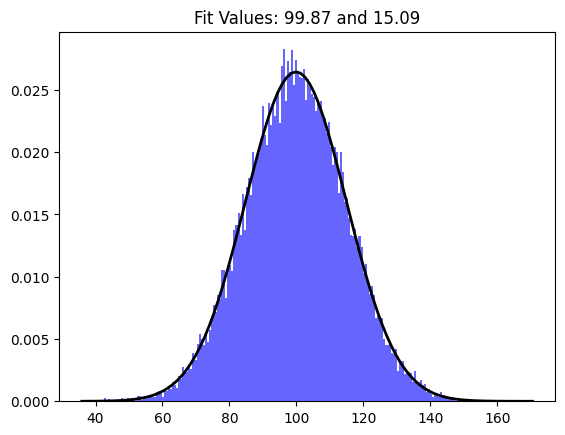

In [24]:
size = 20000
x = np.random.normal(loc=μ, scale=σ, size=size)

mu, std = norm.fit(x) 
  
# Plot the histogram.
plt.hist(x, bins=200, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Media e deviazione standard: {:.2f} e {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

Ora vediamo che c'è una corrispondenza molto buona tra il profilo dell'istogramma e la curva continua. Questo ci consente la seguente interpretazione: la funzione di densità è una curva che approssima il profilo di un istogramma, quando consideriamo un grande numero di osservazioni. In altre parole, una funzione di densità non è altro che un (profilo di un) istogramma nel caso di un numero infinito di osservazioni e intervalli di ampiezza $\Delta$ infinitamente piccoli. 

In un istogramma, l'area di ciascuna barra è proporzionale alla frequenza relativa delle osservazioni in quel'intervallo. Perché tutti gli intervalli hanno la stessa ampiezza, anche l'altezza di ciascuna barra sarà proporzionale alla frequenza relativa delle osservazioni in quel'intervallo.

Nella simulazione, possiamo pensare all'area di ciascuna barra dell'istogramma come alla stima della probabilità che la variabile casuale assuma un valore compreso nell'intervallo considerato. All'aumentare del numero $M$ di osservazioni, le probabilità stimate si avvicinano sempre di più ai veri valori della probabilità. All'aumentare del numero degli intervalli (quando l'ampiezza $\Delta$ dell'intervallo $\rightarrow$ 0), il profilo dell'istogramma tende a diventare una curva continua. Tale curva continua è la funzione di densità di probabilità della variabile casuale. 

Nella statistica descrittiva abbiamo già incontrato una rappresentazione che ha lo stesso significato della funzione di densità, ovvero il *kernel density plot*. La stima della densità del kernel (KDE), infatti, è un metodo non parametrico per stimare la funzione di densità di probabilità di una variabile casuale.

## Funzione di densità di probabilità

Da un punto di vista matematico, l'intuizione precedente si può esprimere nel modo seguente.  

Per descrivere le probabilità che possono essere associate ad una variabile casuale continua $X$ è necessario definire una funzione $p(X)$ che deve soddisfare le seguenti due proprietà:

-   $p(x) \geq 0, \forall x$, ovvero, l'ordinata della funzione di densità è 0 o positiva;
-   $\int_{-\infty}^{\infty} p(x) \,\operatorname {d}\!x = 1$, ovvero, l'area sottesa dalla $p(x)$ è unitaria[^020_density_func-3];
-   $p(a < x < b) = \int_a^b p(x) \,\operatorname {d}\!x$, se $a \leq b$, ovvero, l'area sottesa dalla $p(y)$ tra due punti $a$ e $b$ corrisponde alla probabilità che la v.c. $x$ assuma un valore compresto tra questi due estremi.

[^020_density_func-3]: Per quel che riguarda la notazione dell'integrale, ovvero $\int_x \,\operatorname {d}\!x$, rimando alla discussione di S.P. Thompson: https://calculusmadeeasy.org/1.html

*Interpretazione.* È possibile che $p(x) > 1$, quindi una densità di probabilità non può essere interpretata come una probabilità. Piuttosto, la densità $p(x)$ può essere utilizzata per confrontare la credibilità relativa che può essere assegnata a diversi valori $x$. Considerata una variabile casuale $X$ di cui è disponibile un insieme di realizzazioni, possiamo dire che, se consideriamo due valori $x_k$ e $x_l$ con $p(x_k) > p(x_l)$, allora possiamo concludere che è più credibile, in termini relativi, osservare realizzazioni $X$ nell'intorno di $x_k$ piuttosto che nell'intorno di $x_l$.

## La funzione di ripartizione per una variabile casuale continua

Per le variabili casuali continue, la funzione di ripartizione (ovvero, la distribuzione cumulativa) è definita esattamente come nel caso delle variabili casuali discrete:

$$
F_{\Theta}(\theta) = P(\Theta \leq \theta).
$$

Cioè, è la probabilità che la variabile casuale $\Theta$ assuma un valore minore di o uguale a $\theta$. 

Come nel caso discreto, la funzione di ripartizione di una v.c. continua può essere utilizzata per calcolare la probabilità che la v.c. assuma valori in un certo intervallo.  

## Media e mediana

Concludiamo questo capitolo con alcune considerazioni relative al contronto tra la media (valore atteso) e la mediana, nel caso di variabili casuali continue.

Per distribuzioni simmetriche, sappiamo che la media e la mediana sono uguali. Chiediamoci ora cosa succede, nel caso di variabili casuali continue, nel caso di distribuzioni asimmetriche.

La mediana indica il punto in cui la "massa totale" della distribuzione è suddivisa in due porzioni uguali. Nel caso della densità di probabilità, ciascuna di queste porzioni rappresenta un'area uguale, $A_1 = A_2 = 1/2$ poiché l'area totale sottesa alla funzione di densità è 1 per definizione.

![Qual è la differenza tra mediana e media in una funzione di densità?](images/median_mean.png)

La figura precedente mostra come differiscono i due concetti di mediana (indicata dalla linea verticale) e media (indicata dal "punto di equilibrio" triangolare). A sinistra, per una densità di probabilità simmetrica, la media e la mediana coincidono. A destra, una piccola porzione della distribuzione è stata spostata all'estremo destro. Questa modifica non ha influito sulla posizione della mediana, poiché le aree a destra e a sinistra della linea verticale sono ancora uguali. In altri termini, la mediana, $x_m$, divide l'area sottesa alla funzione di densità in due porzioni uguali:

$$
\int_{-\infty}^{x_m} p(x) dx = \int_{x_m}^{-\infty} p(x) dx = \frac{1}{2}.
$$

Segue da tale definizione che la mediana è il valore $x$ per il quale la distribuzione cumulativa soddisfa

$$
F(x_m) = \frac{1}{2}.
$$

Tuttavia, il fatto che una parte della massa sia stata allontanata verso destra porta a uno spostamento della media della distribuzione, per compensare tale cambiamento. In altre parole, la media contiene più informazioni sulla distribuzione "spaziale" delle osservazioni, rispetto alla mediana. Ciò deriva dal fatto che la media della distribuzione (il valore atteso) è una "somma" -- cioè è un integrale -- di termini cha hanno la forma $x p(x) \Delta x$. Quindi la posizione lungo l'asse $x$, ovvero $x$, e non solo la "massa", $p(x) \Delta x$, influenza il contributo che le componenti della distribuzione hanno sulla media.